 
Отправляйте .ipynb файл на почту katusha.borodich@yandex.ru с темой письма "Фамилия_Имя_ДЗ_3" .

**Дедлайн: 20.12.21 23:59:59**

# Домашнее задание 3


## Convergence speed

*1. Show with the definition that the sequence $\left\{ \dfrac{1}{k} \right\}_{k=1}^\infty$ does not have a linear convergence rate (but it converges to zero).*

__Solution__. Obviously the given sequence converges to zero. Since
$$\lim_{k\to\infty}\left|\frac{1/(k+1)-0}{1/k-0}\right|=1\notin(0,1)$$
we conclude that the convergence rate is not linear.

*2. Determine the convergence or divergence of a given sequence $r_{k} = 0.707^k$.*

__Solution__. Here the limit is again zero and since
$$|r_{k+1}-0|\le Cq^k$$
where $C=1, q=0.707$ we deduce that the convergence rate is linear (geometric progression).

*3. Determine the convergence or divergence of a given sequence $r_{k} = 0.707^{2^k}$*

__Solution__. The sequence converges to zero with quadratic rate in force of the inequality
$$|r_k-0|\le Cq^{2^k}$$
where $C=1, q=0.707$.

*4. Determine the convergence or divergence of a given sequence $r_{k} = \frac{1}{k!}$.*


__Solution__. We have
$$\lim_{k\to\infty}\frac{1/(k+1)!}{1/k!}=0$$
so the sequence converges to zero superlinearly.

##Gradient descent, [Hobbit village](https://courses.cs.ut.ee/MTAT.03.227/2015_spring/uploads/Main/home-exercises-5.pdf)

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import random
# import seaborn as sns
import copy
# sns.set()
import warnings
warnings.simplefilter("ignore")

Below one can find function plotting the village

In [5]:
def plot_village(coordinates, l=1):
    # Checking, that all the coordinates are less than l
    assert (coordinates <= l).all(), 'All the houses should be in a village'
    
    # Draw horizontal line
    plt.hlines(0, 0, l)
    plt.xlim(0, l)
    plt.ylim(-0.5, 0.5)
    
    # Draw house points
    y = np.zeros(np.shape(coordinates))
    plt.title('The Hobbit Village')
    plt.plot(coordinates,y,'o',ms = 10)
    plt.axis('off')
    plt.xlabel('Coordinates')
    fig = plt.gcf()
    fig.set_size_inches(15, 1)
    plt.show()

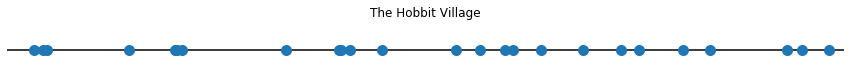

In [21]:
N = 25
l = 10
x = np.random.rand(N)*l
    
plot_village(x, l)

The inhabitants of a one-dimensional village want to connect to the Internet, so they need a central service station from which a cable will stretch to all the houses in the village. Let the price of the cable to be pulled from the station to each house independently be determined by some function p(d) . Then it is clear that the village will have to pay the following amount for access to the World Wide Web:
$$
P(w, x) = \sum\limits_{i=1}^N p(d_i) = \sum\limits_{i=1}^N p(|w - x_i|)
$$
$w$ - station location, $x_i$ - location of $i$ house.

Write analytical solution $w^*$ for minimization $P(w,x)$, if $p(d) = d^2$

**Решение**. $$\frac{\partial P}{\partial w}=\sum\limits_{i=1}^N \frac{\partial p(w - x_i)}{\partial w}=\sum\limits_{i=1}^N 2(w - x_i)=2\left(Nw-\sum\limits_{i=1}^N x_i\right)$$
$$w^*=\frac{1}{N}\sum\limits_{i=1}^N x_i$$

Write loss function $P(x,w)$

In [22]:
def P(x, w):
    return np.sum((w-x)**2)

Plot loss function on the range $(0, l)$

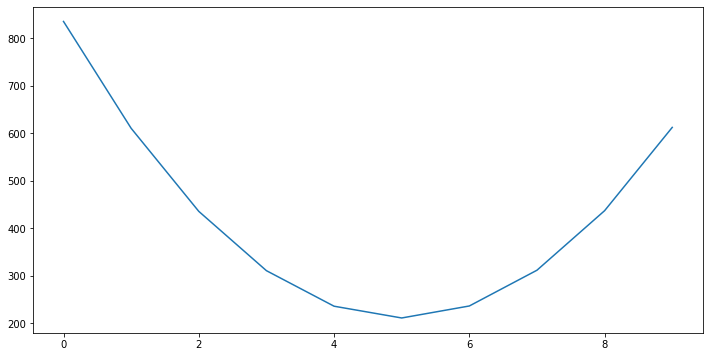

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(range(l), [P(x, i) for i in range(l)])
plt.show()

Write gradient of loss function

In [24]:
def dP(x, w):
    return 2 * (x.shape[0] * w - np.sum(x))

Plot gradient of loss function on the range $(0,l)$. Which point on the graph is of particular interest? Why?

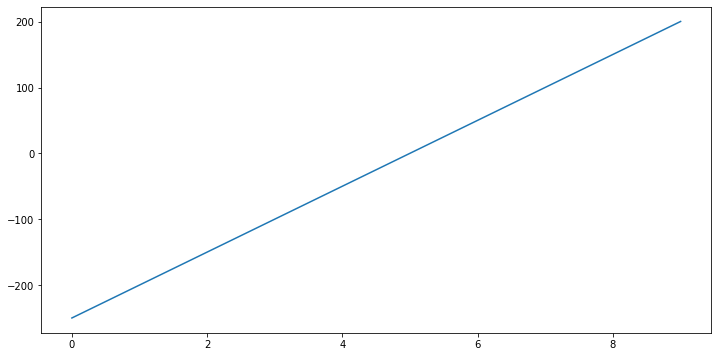

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(range(l), [dP(x, i) for i in range(l)])
plt.show()

Write function `gradient_descent`, which returns $w_k$ after a fixed number of steps.   

$$
w_{k+1} = w_k - \mu \nabla P(w_k)
$$

In [34]:
def gradient_descent(x, w_0, steps_count, grad_P=dP, mu=0.1, N=25):
    w_prev = w_0
    for k in range(steps_count):
        w_next = w_prev - mu * grad_P(x, w_prev) / N
        w_prev = w_next
    return w_next

Modify `gradient_descent` to return all optimization trajectory.
Plot loss function trajectory for the following learning rates $\mu = 0.01, 0.1, 0.15, 0.19, 0.20, 0.21$.   
Draw conclusions.

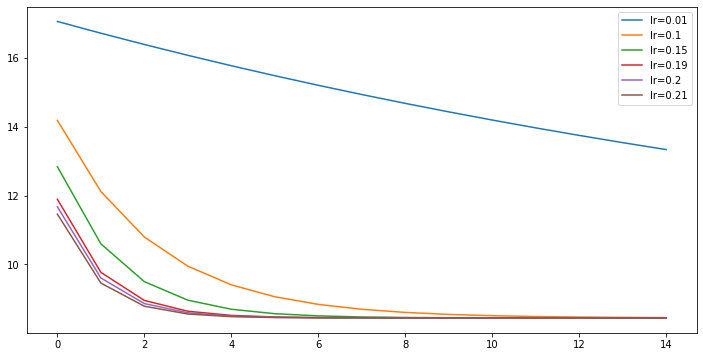

In [46]:
plt.figure(figsize=(12, 6))
steps_count = 15
for mu in [0.01, 0.1, 0.15, 0.19, 0.2, 0.21]:
    w_0 = 2
    w_history = []
    loss_history = []
    for i in range(steps_count):
        w = gradient_descent(x, w_0, 1, mu=mu)
        w_0 = w
        w_history.append(w)
        loss_history.append(P(x, w) / N)
    plt.plot(range(steps_count), loss_history, label=f'lr={mu}')
plt.legend()
plt.show()

## Projected gradient descent

Find projection on the $S$ set $\pi_S (y) = \pi$ if: 

$$
S = \{x \in \mathbb{R}^n \mid Ax = b, A \in \mathbb{R}^{m \times n}, b \in \mathbb{R}^{m}\}, y \notin S
$$

Hint: Check [fmin.xyz](https://fmin.xyz) 

**Решение**. We need to find $\arg\min_{x\in S}\lVert{x-y}\rVert^2$. So let's find the optimum of the following problem:
$$\min_{x\in S}\lVert{x-y}\rVert^2.$$
The Lagrange function is
$$L(x, y, \lambda)=\langle x-y, x-y\rangle + \langle\lambda, Ax-b\rangle$$
$$d_x L=2\langle x-y, dx\rangle + \langle \lambda, Adx\rangle=\langle 2x-2y+A^T\lambda, dx\rangle.$$
$\lambda^*$ can be found from the equation
$$A(2x^*-2y+A^T\lambda^*)=b \iff b-2Ay+AA^T\lambda^*=0 \iff \lambda^*=(AA^T)^{-1}(2Ay-b)$$
and the answer will be
$$x^*=y-\frac{1}{2}A^T\lambda^*=y-A^T(AA^T)^{-1}\left(Ay-\frac{1}{2}b\right).$$

For following problem:

$$
\left\{ \begin{array}{l} 
\displaystyle \big\lVert Ax - b \big\rVert_2^2 \longrightarrow \min_{x \in \mathbb{R}^n}, \\\\[-1em]
Cx = d.
\end{array} \right. \ \ \begin{array}{l}
A \in \mathbb{R}^{m \times n}, \ m \geq n, \ \text{rg}\, A = n \\
C \in \mathbb{R}^{k \times n}, \ k \leq n, \ \text{rg}\, C = k
\end{array} \ b \in \mathbb{R}^m, \ d \in \mathbb{R}^k
$$


* Write KKT conditions;

The Lagrange function is
$$L(x, \lambda)=\big\lVert Ax - b \big\rVert_2^2 + \lambda^T(Cx-d)$$
$$d_x L=\langle2A^T(Ax-b), dx\rangle + \langle C^T\lambda, dx\rangle$$
KKT conditions:
$$ Cx^*=d,\quad  d_x L(x^*, \lambda^*)=0$$

* Find $x^\ast$ - solution;
$$2A^T(Ax^*-b)+C^T\lambda^*=0\quad\implies\quad x^*=\frac{1}{2}(A^TA)^{-1}(2A^Tb-C^T\lambda^*)$$
$$Cx^*=d\quad\implies\quad \frac{1}{2}C(A^TA)^{-1}(2A^Tb-C^T\lambda^*)=d\quad\implies\quad \lambda^*=2(CC^T)^{-1}(C(A^TA)^{-1}A^Tb-d)$$
Answer:
$$x^*=(A^TA)^{-1}\bigg(A^Tb-C^T(CC^T)^{-1}(C(A^TA)^{-1}A^Tb-d)\bigg)$$

Implement projected gradient descent for following task.

$$
\left\{ \begin{array}{l} 
\displaystyle \big\lVert Ax - b \big\rVert_2^2 \longrightarrow \min_{x \in \mathbb{R}^n}, \\\\[-1em]
Cx = d.
\end{array} \right. \ \ \begin{array}{l}
A \in \mathbb{R}^{m \times n}, \ m \geq n, \ \text{rg}\, A = n \\
C \in \mathbb{R}^{k \times n}, \ k \leq n, \ \text{rg}\, C = k
\end{array} \ b \in \mathbb{R}^m, \ d \in \mathbb{R}^k
$$

Compare with analytical solution and `scipy.optimize`

In [2]:
A = np.array([[1, 2],
              [3, 4]])

b = np.array([[5],
              [6]])

C = np.array([[7, 8],
              [9, 10]])

d = np.array([[11],
              [12]])

def gradient(x, A=A, b=b):
    return 2 * A.T @ (A @ x - b)

def projection(y, C=C, d=d):
    return y - C.T @ np.linalg.inv(C.T @ C) @ (C @ y - d / 2)

def gradient_descent(x0, steps_count=20, lr=1e-5, grad=gradient, proj=projection):
    xs = [x0]
    for i in range(steps_count):
        xs.append(proj(xs[-1] - lr * grad(xs[-1])))
    return xs

def analytical_solution(A=A, b=b, C=C, d=d):
    return np.linalg.inv(A.T @ A) @ (A.T @ b - C.T @ np.linalg.inv(C @ C.T) @ (C @ np.linalg.inv(A.T @ A) @ A.T @ b - d))

In [4]:
# xs = gradient_descent(np.array([[-29.5], [22.5]]))
# for i in range(len(xs)):
#     print(i, xs[i][0], xs[i][1])

In [24]:
analytical_solution()

array([[-29.5],
       [ 22.5]])

##Newtown Method

Докажите, что для метода Ньютона обладает афинной инвариантностью, т.е. если есть преобразование координат
$\hat{f}(z) = f(x)$, где $x = Sz + s$, $s \in \mathbb{R}^n$, $S \in \mathbb{R}^{n \times n}$ то будет выполняться:

$$\nabla \hat f(z) = S^T \nabla f(x)$$

$$\nabla^2 \hat{f} (z) = S^T \nabla f(x) S$$

**Решение**. We have
$$\langle \nabla f\hat(z), dz\rangle=\langle \nabla f(x), Sdx\rangle=\langle S^T\nabla f(x),dx\rangle$$
and
$$\langle \nabla^2f\hat(z)dz_1, dz_2\rangle=\langle \nabla^2f(x)Sdx_1, Sdx_2\rangle=\langle S^T\nabla^2f(x)Sdx_1, dx_2\rangle$$
as needed.

Реализуйте на языке python метод Ньютона для минимизации следующих функций:
* Квадратичная форма $f(x) = \frac{1}{2}x^TAx + b^Tx$, $x \in \mathbb{R}^n$, $A \in \mathbb{S}_+^{n \times n}$. Попробуйте n = 2, 50, 228
* Функция Розенброка $f(x,y) = (1 - x)^2 + 100(y - x^2)^2 $

Сравните реализованный Вами метод и метод [BFGS](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-bfgs.html) из библиотеки scipy , а так же его модификацию [L-BFGS](https://docs.scipy.org/doc/scipy/reference/optimize.minimize-lbfgsb.html) в решении
задачи минимизации описанных выше функций. точку старта необходимо инициализировать одинаковую для всех
методов в рамках одного запуска. Необходимо провести не менее 10 запусков для каждого метода на каждой функции до
достижения того критерия остановки, который вы выберете (например, расстояние до точки оптимума - во всех задачах
мы её знаем).

В качестве результата нужно для каждого метода и каждой задачи для различных размерностей(в задаче квадратичного программирования) вывести число итераций для достижения необходимой точности сходимости и время работы метода (усредненнить по числу запусков количество
итераций, необходимых для сходимости и времени работы).

P.S. если в силу каких то причин Вам не удалось сделать задание полностью, попробуйте сфокусироваться хотя бы на его
части.

In [54]:
def newton(func, derivative, nabla_squared, x_init, A, b, steps_count=15):
    x_prev = x_init
    x_history = [x_init]
    for i in range(steps_count):
        x_next = x_prev - np.linalg.inv(nabla_squared(x_prev, A, b)) @ derivative(x_prev, A, b)
        x_history.append(x_next)
        x_prev = x_next
    return x_history

In [6]:
def quadr_form(x, A, b):
    return x.T @ A @ x / 2 + b.T @ x

def quadr_derivative(x, A, b):
    return A @ x + b

def quadr_nabla_squared(x, A, b):
    return A

In [7]:
def rosen(xy, A=None, b=None):
    x = xy[0]
    y = xy[1]
    return (1 - x)**2 + 100 * (y - x**2)**2

def rosen_derivative(xy, A=None, b=None):
    x = xy[0]
    y = xy[1]
    return np.array([2 * (x - 1) + 400 * x * (x**2 - y), 
                     200 * (y - x**2)])

def rosen_nabla_squared(xy, A=None, b=None):
    x = xy[0]
    y = xy[1]
    return np.array([[2 + 1200*x**2 - 400*y, -400*x],
                     [-400*x, 200]], dtype='float')

In [50]:
from scipy.optimize import minimize

for n in [2, 50, 228]:
    print(f'n = {n}')
    A = np.random.rand(n, n)
    A = A @ A.T # now A is positively semidefinite
    A = A + A.T # and now A is symmetric too
    b = np.random.rand(n, 1)
    x0 = np.random.rand(n, 1)
    maxiter = 120
    
    xs = newton(quadr_form, quadr_derivative, quadr_nabla_squared, x0, A, b)
    
    BFGS_res = minimize(quadr_form, x0, args=(A, b), method='BFGS', options={'maxiter': maxiter})
    
    LBFGSB_res = minimize(quadr_form, x0, args=(A, b), method='L-BFGS-B', options={'maxiter': maxiter})
    
    BFGS_error = np.sum((xs[-1].reshape((n,)) - BFGS_res.x)**2) / np.sum(xs[-1].reshape((n,))**2 + BFGS_res.x**2)
    LBFGSB_error = np.sum((xs[-1].reshape((n,)) - LBFGSB_res.x)**2) / np.sum(xs[-1].reshape((n,))**2 + LBFGSB_res.x**2)
    
#     print('ans:', xs[-1].reshape((n,)))
#     print('bfgs:', BFGS_res.x)
#     print('lbfgsb:', LBFGSB_res.x)
#     print(f'BFGS_error = {BFGS_error},\nLBFGSB_error = {LBFGSB_error}\n')

    print(f'BFGS iter count: {BFGS_res.nit},', f'LBFGSB iter count: {LBFGSB_res.nit}')

n = 2
BFGS iter count: 12, LBFGSB iter count: 9
n = 50
BFGS iter count: 99, LBFGSB iter count: 120
n = 228
BFGS iter count: 120, LBFGSB iter count: 55


In [111]:
xs = newton(rosen, rosen_derivative, rosen_nabla_squared, np.array([[5], [12]]))
print('handwritten result:', xs[-1].reshape((2,)))
res = minimize(rosen, np.array([[5], [15]]), method='BFGS')
print('BFGS result:', res.x)
res = minimize(rosen, np.array([[5], [15]]), method='L-BFGS-B')
print('L-BFGS-B result:', res.x)

handwritten result: [1. 1.]
BFGS result: [0.9999964  0.99999275]
L-BFGS-B result: [0.99999616 0.99999227]


In [55]:
A = np.array([[2, -1],
              [-1, 7]])

b = np.array([[3], 
              [5]])

xs = newton(rosen, rosen_derivative, rosen_nabla_squared, np.array([[5], [15]]), A=A, b=b)
print('handwritten result:', xs[-1].reshape((2,)))
res = minimize(rosen, np.array([[5], [15]]), method='BFGS')
print('BFGS result:', res.x)
res = minimize(rosen, np.array([[5], [15]]), method='L-BFGS-B')
print('L-BFGS-B result:', res.x)

handwritten result: [1. 1.]
BFGS result: [0.9999964  0.99999275]
L-BFGS-B result: [0.99999616 0.99999227]


## Linear Programming

Random Corp is producing covers for following products:

* phones
* headphones
* laptops

The company’s production facilities are such that if we devote the entire production to headphones covers, we can produce 5000 of
them in one day. If we devote the entire production to phone covers or laptop covers, we can produce 4000 or 2000 of them in one
day.
The production schedule is one week (6 working days), and the week’s production must be stored before distribution. Storing 1000
headphones covers (packaging included) takes up 30 cubic feet of space. Storing 1000 phone covers (packaging included) takes up
50 cubic feet of space, and storing 1000 laptop covers (packaging included) takes up 220 cubic feet of space. The total storage
space available is 6000 cubic feet.
Due to commercial agreements with Random Corp has to deliver at least 4500 headphones covers and 3000 laptop covers per week
in order to strengthen the product’s diffusion.
The marketing department estimates that the weekly demand for headphones covers, phone, and laptop covers does not exceed
9000 and 14000, and 7000 units, therefore the company does not want to produce more than these amounts for headphones, phone,
and laptop covers.
Finally, the net prot per each headphones cover, phone cover, and laptop cover is $5, $7, and $12, respectively.
The aim is to determine a weekly production schedule that maximizes the total net prot.

Find the solution to the problem using [PuLP](https://coin-or.github.io/pulp/)

In [63]:
from pulp import *

prob = LpProblem("TheRandomCorpProblem", LpMaximize)

x1 = LpVariable("HeadphoneCoversCount", 4500, 9000, LpInteger)
x2 = LpVariable("PhoneCoversCount", 0, 14000, LpInteger)
x3 = LpVariable("LaptopCoversCount", 3000, 7000, LpInteger)

prob += 5 * x1 + 7 * x2 + 12 * x3, "TheProfit"

prob += 4 * x1 + 5 * x2 + 10 * x3 == 120000, "TimeRequirement"
prob += 3 * x1 + 5 * x2 + 22 * x3 <= 600000, "SpaceRequirement"

prob.writeLP("RandomCorpModel.lp")

prob.solve()

print("Status:", LpStatus[prob.status])

for v in prob.variables():
    print(v.name, "=", v.varValue)

Status: Optimal
HeadphoneCoversCount = 5000.0
LaptopCoversCount = 3000.0
PhoneCoversCount = 14000.0
